In [1]:
from car_listing_visual_verification.config import PROCESSED_DATA_FILE, RAW_DATA_DIR, PROCESSED_DATA_PT

import pandas as pd

2026-01-28 19:23:20.492 | INFO     | car_listing_visual_verification.config:<module>:11 - PROJ_ROOT path is: /Users/ruslan/Projects/car-listing-visual-verification


In [2]:
df = pd.read_csv(PROCESSED_DATA_FILE)

In [3]:
df

,image_path,class_id,class_name,bbox_x1,bbox_x2,bbox_y1,bbox_y2
0,00001.jpg,14,Audi TTS Coupe 2012,14,14,14,14
1,00002.jpg,3,Acura TL Sedan 2012,3,3,3,3
2,00003.jpg,91,Dodge Dakota Club Cab 2007,91,91,91,91
3,00004.jpg,134,Hyundai Sonata Hybrid Sedan 2012,134,134,134,134
4,00005.jpg,106,Ford F-450 Super Duty Crew Cab 2012,106,106,106,106
...,...,...,...,...,...,...,...
8139,08140.jpg,78,Chrysler Town and Country Minivan 2012,78,78,78,78
8140,08141.jpg,196,smart fortwo Convertible 2012,196,196,196,196
8141,08142.jpg,163,Mercedes-Benz SL-Class Coupe 2009,163,163,163,163
8142,08143.jpg,112,Ford GT Coupe 2006,112,112,112,112


In [4]:
df[df["class_id"] == 1]

,image_path,class_id,class_name,bbox_x1,bbox_x2,bbox_y1,bbox_y2
162,00163.jpg,1,AM General Hummer SUV 2000,1,1,1,1
461,00462.jpg,1,AM General Hummer SUV 2000,1,1,1,1
521,00522.jpg,1,AM General Hummer SUV 2000,1,1,1,1
706,00707.jpg,1,AM General Hummer SUV 2000,1,1,1,1
772,00773.jpg,1,AM General Hummer SUV 2000,1,1,1,1
886,00887.jpg,1,AM General Hummer SUV 2000,1,1,1,1
945,00946.jpg,1,AM General Hummer SUV 2000,1,1,1,1
1276,01277.jpg,1,AM General Hummer SUV 2000,1,1,1,1
1660,01661.jpg,1,AM General Hummer SUV 2000,1,1,1,1
1831,01832.jpg,1,AM General Hummer SUV 2000,1,1,1,1


In [22]:
import matplotlib.pyplot as plt

In [23]:
df['class_id'].nunique()

196

<Axes: xlabel='class_id'>

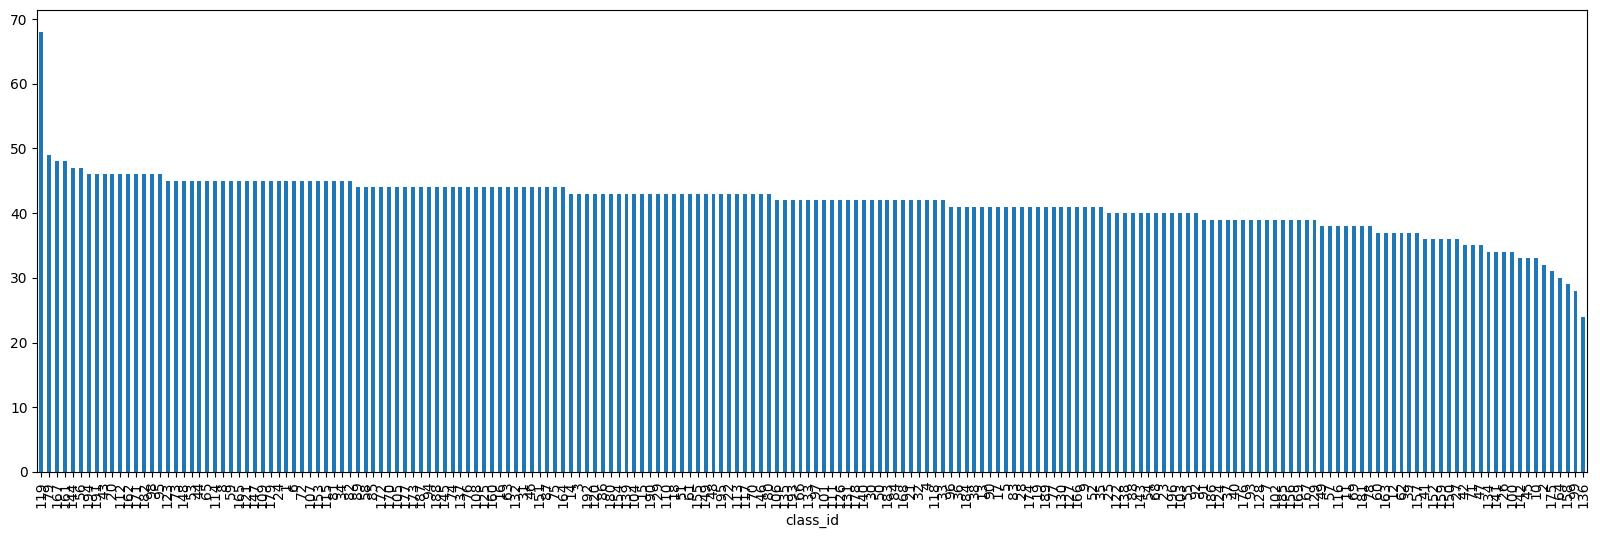

In [24]:
df['class_id'].value_counts().plot(kind='bar', figsize=(20,6))

In [8]:
import os
missing_files = [f for f in df['image_path'] if not os.path.exists(RAW_DATA_DIR / "cars_train/cars_train" / f)]

In [9]:
missing_files

[]

In [10]:
import torch

processed_data = torch.load(PROCESSED_DATA_PT)

In [11]:
processed_data.shape

torch.Size([8144, 3, 244, 244])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..-1.8044444].


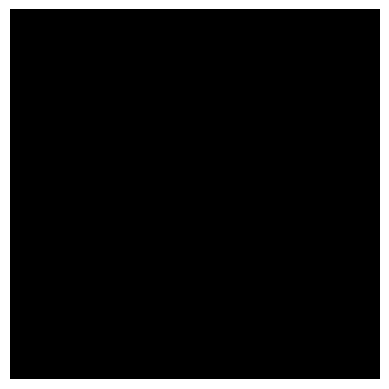

In [27]:
img = processed_data[0]
img = img.permute(1, 2, 0)

plt.imshow(img)
plt.axis("off")
plt.show()

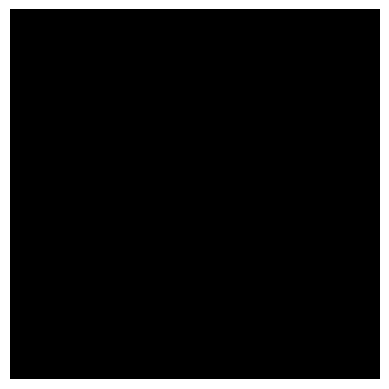

In [31]:
img = processed_data[0].clone().cpu()
img = img * std[:, None, None] + mean[:, None, None]
img = img.clamp(0, 1)
img = img.permute(1, 2, 0).numpy()

plt.imshow(img)
plt.axis("off")
plt.show()


In [33]:
print(df["bbox_x1"], type(df["bbox_x1"]))

0        14
1         3
2        91
3       134
4       106
       ... 
8139     78
8140    196
8141    163
8142    112
8143     17
Name: bbox_x1, Length: 8144, dtype: int64 <class 'pandas.Series'>
